In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [36]:

df=pd.read_excel('./archivos/archivosSeparados/DataFramePrueba.xlsx')

In [37]:
df

,IdentificadorCliente,FechaEvento,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,...,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,UsoAppWeb,ScoreCrediticio,Genero,Edad,DiasMora,PerdidaCartera
0,1,2022-09-19T13:25:31.867Z,0.1184320077740548479,NaN,0.0,9.0,9.0,0.0,9.0,0.0,...,PRINCIPAL,Fisico,0.0,3.000000e+10,NaN,865.0,Femenino,37.0,0,0
1,2,2023-08-23T11:33:46.417Z,0.0771590000000000000,hogar-y-muebles,NaN,5.0,4.0,1.0,4.0,1.0,...,INTERMEDIO,Fisico,0.0,2.000000e+10,NaN,726.0,Femenino,38.0,0,0
2,3,2022-10-01T14:59:48.920Z,0.1855666666666666667,NaN,129.0,33.0,33.0,0.0,33.0,0.0,...,PEQUEÃ‘O,Fisico,1.0,3.000000e+10,NaN,0.0,Femenino,35.0,0,0
3,4,2022-09-22T21:25:09.187Z,null,NaN,0.0,3.0,3.0,0.0,3.0,0.0,...,GRANDE,Fisico,0.0,5.000000e+09,NaN,837.0,Masculino,34.0,0,0
4,5,2023-03-19T17:48:52.310Z,0.4752148710773535878,computacion,0.0,4.0,4.0,0.0,4.0,0.0,...,GRANDE,Fisico,1.0,5.000000e+09,App,487.0,Femenino,55.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146934,146935,2023-10-20T16:31:14.983Z,0.2875120000000000000,belleza-y-cuidado-personal,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,5.000000e+09,NaN,632.0,Femenino,25.0,0,0
146935,146936,2023-10-20T20:58:15.520Z,null,electrodomesticos,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,3.000000e+09,App,579.0,Femenino,35.0,0,0
146936,146937,2023-10-23T22:57:35.243Z,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,INTERMEDIO,Fisico,0.0,3.000000e+09,NaN,578.0,Masculino,20.0,772,1
146937,146938,2023-10-30T15:09:00.610Z,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,INTERMEDIO,Fisico,0.0,1.500000e+09,NaN,0.0,Desconocido,19.0,1614,1


In [38]:
vars_predictoras_cuantitativas=[    "UsabilidadCupo",
    "DiasMaximosMoraCreditosGenerados",
    "NumeroCreditosGPrevius",
    "NumeroCreditosGCanalFPrevius",
    "NumeroCreditosGCanalVPrevius",
    "NumeroCreditosGEstadoActivosPrevius",
    "NumeroCreditosGEstadoPagadosPrevius",
    "NumeroCreditosLPrevius",
    "NumeroCreditosLEstadoActivosPrevius",
    "NumeroCreditosLEstadoPagadosPrevius",
    "TotalPagosEfectuadosGlobalmentePrevius",
    "TotalPagosEfectuadosLocalmentePrevius",
    "NumeroIntentosFallidos",
    "CupoAprobado",
    "ScoreCrediticio",
    "Edad",
    "DiasMora",
    "PerdidaCartera"
]
vars_predictoras_categoricas=[ "IdentificadorCliente",
    "FechaEvento",
    "CategoriaPrincipalCredito",
    "FechaVinculacionCliente",
    "FechaPrimerUso",
    "CodigoAlmacenEntregaTC",
    "CodigoMunicipioEntregaTC",
    "TipoMunicipioEntregaTC",
    "CanalMunicipioEntregaTC",
    "UsoAppWeb",
    "Genero",
    "PerdidaCartera"]

In [39]:
vars_a_eliminar=["IdentificadorCliente","FechaEvento","FechaPrimerUso","FechaUltimoUso"]

In [50]:
vars_encoding=[ 
    "CategoriaPrincipalCredito",
    "TipoMunicipioEntregaTC",
    "CanalMunicipioEntregaTC",
    "UsoAppWeb",
    "Genero",
    "PerdidaCartera"]

In [51]:


label_encoders = {}



for col in vars_encoding:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convierte a string para evitar errores
    label_encoders[col] = le  # Guarda el encoder si necesitas transformar nuevos datos


In [52]:
df = df.drop(columns=vars_a_eliminar)

KeyError: "['IdentificadorCliente', 'FechaEvento', 'FechaPrimerUso', 'FechaUltimoUso'] not found in axis"

In [53]:
df

,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,...,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,UsoAppWeb,ScoreCrediticio,Genero,Edad,DiasMora,PerdidaCartera
4,0.4752148710773535878,9,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0,0,1.0,5.000000e+09,0,487.0,1,55.0,0,0
10,0.1248160000000000000,16,0.0,7.0,7.0,0.0,7.0,0.0,0.0,0.0,...,6,1,0.0,5.000000e+09,0,0.0,2,35.0,0,0
13,0.0732485183968226177,8,122.0,40.0,33.0,0.0,39.0,7.0,1.0,0.0,...,4,0,0.0,3.000000e+10,2,0.0,1,36.0,0,0
21,0.0488134355830886867,6,31.0,53.0,53.0,0.0,53.0,0.0,1.0,0.0,...,4,0,0.0,2.000000e+10,2,357.0,1,39.0,0,0
22,0.1214560000000000000,16,0.0,21.0,21.0,0.0,21.0,0.0,0.0,0.0,...,3,0,0.0,1.000000e+10,2,854.0,1,57.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146897,0.0511580000000000000,3,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,...,6,1,0.0,1.000000e+10,0,646.0,1,24.0,0,0
146898,10000000000000000000,6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0.0,1.500000e+09,0,0.0,1,20.0,0,0
146913,0.1865260000000000000,8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,6,1,0.0,2.000000e+10,0,762.0,1,41.0,0,0
146914,0.3169974006213149052,24,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,1,0,0.0,5.000000e+09,0,616.0,2,21.0,1730,1


In [54]:
# Reemplazar 'null' por NaN en todo el dataframe
df.replace('null', np.nan, inplace=True)

# Opcional: Puedes eliminar filas con valores faltantes
df.dropna(inplace=True)


# Ahora puedes proceder con el código de entrenamiento
X = df.drop(columns='PerdidaCartera')  # Asegúrate de eliminar la columna de objetivo
y = df['PerdidaCartera']

## Feature selection

In [55]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [56]:
# Definir la variable objetivo
y = df['PerdidaCartera']

# Definir las variables predictoras eliminando la variable objetivo
X = df.drop(columns=['PerdidaCartera'])


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [58]:
efs = EFS(
estimator=RandomForestClassifier(n_estimators=3, random_state=0),
 min_features=1,
max_features=4,
scoring='roc_auc',
cv=2,
)
efs = efs.fit(X_train, y_train)

Features: 15275/15275

In [60]:
efs.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.51272719, 0.5152134 ]),
  'avg_score': np.float64(0.5139702945320745),
  'feature_names': ('UsabilidadCupo',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53369754, 0.53619399]),
  'avg_score': np.float64(0.5349457601414885),
  'feature_names': ('CategoriaPrincipalCredito',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.54357501, 0.54828382]),
  'avg_score': np.float64(0.5459294144454705),
  'feature_names': ('DiasMaximosMoraCreditosGenerados',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.54721285, 0.55243373]),
  'avg_score': np.float64(0.5498232903531739),
  'feature_names': ('NumeroCreditosGPrevius',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.5467638 , 0.55285994]),
  'avg_score': np.float64(0.5498118695595158),
  'feature_names': ('NumeroCreditosGCanalFPrevius',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.73290665, 0.73336416]),
  'avg_score': np.float64(0.7331354063975577),
  'feature_names':

In [59]:
efs.best_feature_names_,

(('NumeroCreditosGPrevius',
  'NumeroIntentosFallidos',
  'UsoAppWeb',
  'DiasMora'),)

In [61]:
selected_variables=['NumeroCreditosGPrevius',
  'NumeroIntentosFallidos',
  'UsoAppWeb',
  'DiasMora']

In [68]:
X_depurated=df[selected_variables]
y = df['PerdidaCartera']
X_train, X_test, y_train, y_test = train_test_split(X_depurated, y, random_state=0)

In [69]:
df[selected_variables]

,NumeroCreditosGPrevius,NumeroIntentosFallidos,UsoAppWeb,DiasMora
4,4.0,1.0,0,0
10,7.0,0.0,0,0
13,40.0,0.0,2,0
21,53.0,0.0,2,0
22,21.0,0.0,2,0
...,...,...,...,...
146897,2.0,0.0,0,0
146898,1.0,0.0,0,0
146913,1.0,0.0,0,0
146914,0.0,0.0,0,1730


## MODELS


Logistic Regression - Confusion Matrix:
[[14324     0]
 [    0  3820]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14324
           1       1.00      1.00      1.00      3820

    accuracy                           1.00     18144
   macro avg       1.00      1.00      1.00     18144
weighted avg       1.00      1.00      1.00     18144


Support Vector Machine - Confusion Matrix:
[[14324     0]
 [    0  3820]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14324
           1       1.00      1.00      1.00      3820

    accuracy                           1.00     18144
   macro avg       1.00      1.00      1.00     18144
weighted avg       1.00      1.00      1.00     18144



c:\Users\ASUS RYZEN 7\Documents\PruebaTecnicaKeraunos\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Confusion Matrix:
[[14324     0]
 [    0  3820]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14324
           1       1.00      1.00      1.00      3820

    accuracy                           1.00     18144
   macro avg       1.00      1.00      1.00     18144
weighted avg       1.00      1.00      1.00     18144


Random Forest - Confusion Matrix:
[[14324     0]
 [    0  3820]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14324
           1       1.00      1.00      1.00      3820

    accuracy                           1.00     18144
   macro avg       1.00      1.00      1.00     18144
weighted avg       1.00      1.00      1.00     18144


Neural Network - Confusion Matrix:
[[14324     0]
 [    0  3820]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      

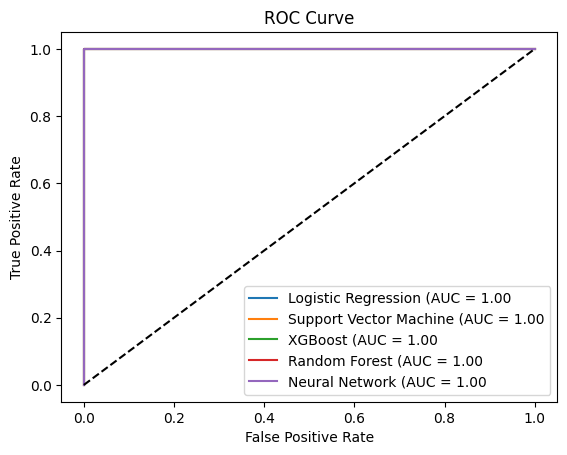

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay
import statsmodels.api as sm


# Función para evaluar y mostrar resultados de un modelo
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_test)
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} - Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')

# Evaluación individual de cada modelo
evaluate_model(LogisticRegression(), X_train, X_test, y_train, y_test, "Logistic Regression")
evaluate_model(SVC(probability=True), X_train, X_test, y_train, y_test, "Support Vector Machine")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train, X_test, y_train, y_test, "XGBoost")
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest")
evaluate_model(MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42), X_train, X_test, y_train, y_test, "Neural Network")



# Configuración final de la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## OTRO CONJUNTO DE VARIABLES

In [72]:
conjunto_al_azar=['DiasMaximosMoraCreditosGenerados',
   'NumeroCreditosLEstadoPagadosPrevius',
   'CupoAprobado']

X_depurated=df[conjunto_al_azar]
y = df['PerdidaCartera']
X_train, X_test, y_train, y_test = train_test_split(X_depurated, y, random_state=0)


In [73]:
df[conjunto_al_azar]

,DiasMaximosMoraCreditosGenerados,NumeroCreditosLEstadoPagadosPrevius,CupoAprobado
4,0.0,0.0,5.000000e+09
10,0.0,0.0,5.000000e+09
13,122.0,1.0,3.000000e+10
21,31.0,1.0,2.000000e+10
22,0.0,0.0,1.000000e+10
...,...,...,...
146897,0.0,0.0,1.000000e+10
146898,0.0,0.0,1.500000e+09
146913,0.0,0.0,2.000000e+10
146914,0.0,2.0,5.000000e+09


In [ ]:
# Evaluación individual de cada modelo
evaluate_model(LogisticRegression(), X_train, X_test, y_train, y_test, "Logistic Regression")
evaluate_model(SVC(probability=True), X_train, X_test, y_train, y_test, "Support Vector Machine")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), X_train, X_test, y_train, y_test, "XGBoost")
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test, "Random Forest")
evaluate_model(MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42), X_train, X_test, y_train, y_test, "Neural Network")



# Configuración final de la curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Logistic Regression - Confusion Matrix:
[[14324     0]
 [ 3820     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     14324
           1       0.00      0.00      0.00      3820

    accuracy                           0.79     18144
   macro avg       0.39      0.50      0.44     18144
weighted avg       0.62      0.79      0.70     18144



c:\Users\ASUS RYZEN 7\Documents\PruebaTecnicaKeraunos\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS RYZEN 7\Documents\PruebaTecnicaKeraunos\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS RYZEN 7\Documents\PruebaTecnicaKeraunos\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf